In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
from tqdm import tqdm
import time

In [2]:
data_path = "plasticGarbageDataset"

### Final function to see annoted_image

In [3]:
def annoted_image(image_name, fold='train'):
  """ Resume each previous step.
  Give the name of the image, and in which folder is it (not the path),
  fold = train, valid or test"""
  fold_path = os.path.join(data_path, fold + '/labels')
  filenames = os.listdir(fold_path)
  for filename in filenames:
    if image_name.split('.jpg')[0] == filename.split('.txt')[0]:
      filepath = os.path.join(fold_path, filename)
      f = open(filepath, 'r')
      lines = f.readlines()
      labels = []
      for line in lines:
        label = line.split()
        label = [float(i) for i in label]
        labels.append(label)
      f.close()
      break

  fold_path = os.path.join(data_path, fold + '/images')
  file_path = os.path.join(fold_path, image_name)
  im =  Image.open(file_path)
  image_width, image_height = im.size
  fig, ax = plt.subplots()
  ax.imshow(im)

  draw = ImageDraw.Draw(im)
  for label in labels:
    _, x_center, y_center, width, height = label
    x_center *= image_width
    y_center *= image_height
    width *= image_width
    height *= image_height
    top_left_x = x_center - (width / 2)
    top_left_y = y_center - (height / 2)
    bottom_right_x = x_center + (width / 2)
    bottom_right_y = y_center + (height / 2)
    draw.rectangle([top_left_x, top_left_y, bottom_right_x, bottom_right_y], outline="red")

  plt.imshow(im)
  plt.axis('off')

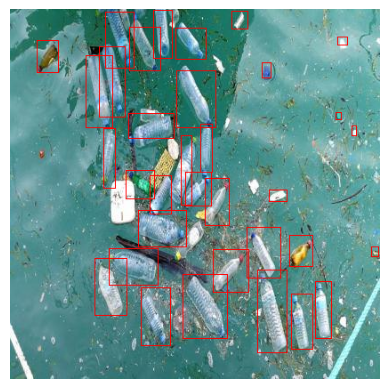

In [4]:
annoted_image('plastic20_jpg.rf.a89c0d5cf93b937170b5f02b3c23cf7d.jpg')

# Datasets

For each Dataset (train valid, test), we will create a dataframe which contains ,for each images :
- name of the image
- number of waste in the image

## A. Create DataFrame

In [5]:
def create_dataframe(fold):
  """ create dataframe with column name of the image and number of waste in the image """
  fold_path_im = os.path.join(data_path, fold + '/images')
  image_names = os.listdir(fold_path_im)
  fold_path_lab = os.path.join(data_path, fold + '/labels')
  labels_names = os.listdir(fold_path_lab)
  ims = []
  number_trash = np.array([])
  for image_name in image_names:
      exist = False
      for labels_name in labels_names:
        if labels_name.split('.txt')[0] == image_name[:len(image_name)-4]:
          filepath = os.path.join(fold_path_lab, labels_name)
          f = open(filepath, 'r')
          lines = f.readlines()
          number_trash = np.append(number_trash,len(lines))
          f.close()
          exist = True
          break
      ims.append(image_name)
      if not exist:
        #the image don't have a label
        number_trash = np.append(number_trash, np.nan)

  res = {
      'image name' : ims,
      'number of waste' : number_trash
  }

  return pd.DataFrame(res)

## Train Dataset

In [6]:
df_train = create_dataframe('train')
df_train.head()

,image name,number of waste
0,1-1_jpg.rf.3c35c15f5361d33821647bfd181b0af7.jpg,8.0
1,1-1_jpg.rf.e2d17c52ecd26b5d05a7f48330f8b61c.jpg,4.0
2,10_jpg.rf.0f387beff9aa43e94e3eacada20a0063.jpg,1.0
3,10_jpg.rf.1829a2896fb876b4498c821aa860220f.jpg,1.0
4,10_jpg.rf.3f4f945e3eba5e91ef96df871380d17c.jpg,1.0


In [7]:
#some informations about number of waste in image
df_train.describe()

,number of waste
count,5504.000000
mean,2.118459
std,3.023524
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,46.000000


In [8]:
# check if some labels are missing
df_train.isnull().sum()

image name         0
number of waste    0
dtype: int64

## Valid Dataset

In [9]:
df_valid = create_dataframe('valid')
df_valid.head()

,image name,number of waste
0,007104744_jpg.rf.c471c6606dbf17f1e5bf3c3ad70d5...,1.0
1,007105123_jpg.rf.f173b4212d72e528f97632d8f22d3...,1.0
2,0211007104833_jpg.rf.e0f4745ec9f43dee52331b71a...,1.0
3,0211007104855_jpg.rf.cbe552b5815998b46f1d587fe...,1.0
4,0211007104914_jpg.rf.01b4713d84c24e2d5b4409929...,1.0


In [10]:
#some informations about number of waste in image
df_valid.describe()

,number of waste
count,1625.000000
mean,1.691077
std,2.870664
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,47.000000


## Test Dataset

In [11]:
df_test = create_dataframe('test')
df_test.head()

,image name,number of waste
0,13_jpg.rf.66bfb9ab5d1ddcfa48351a275b662de0.jpg,1.0
1,15_jpg.rf.c921a18631de7ff12168f4f1b9bf4210.jpg,13.0
2,1bc7-iudfmpmn7245599_jpg.rf.c753c3518aa3bd3046...,1.0
3,200623160205-05-coronavirus-waste-pollution-su...,3.0
4,26_jpg.rf.30ebcae5f6d3f646c1f12e666d4dcdf9.jpg,1.0


In [12]:
#some informations about number of waste in image
df_test.describe()

,number of waste
count,1114.000000
mean,1.537702
std,2.031406
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,35.000000


In [ ]:
# Total data 
print('train :', df_train.shape[0])
print('test :', df_test.shape[0])
print('valid :', df_valid.shape[0])
print('total :', df_train.shape[0] + df_test.shape[0] + df_valid.shape[0])

train : 5504
test : 1114
valid : 1625
total : 8243


In [14]:
print('total trash instances :', df_train['number of waste'].sum()+df_test['number of waste'].sum()+df_valid['number of waste'].sum())

total trash instances : 16121.0


# Analysis

In [15]:
datasets = [df_train, df_valid, df_test]
datasets_names = ['Train', 'Valid', 'Test']

## A. Distribution of Trash Instances

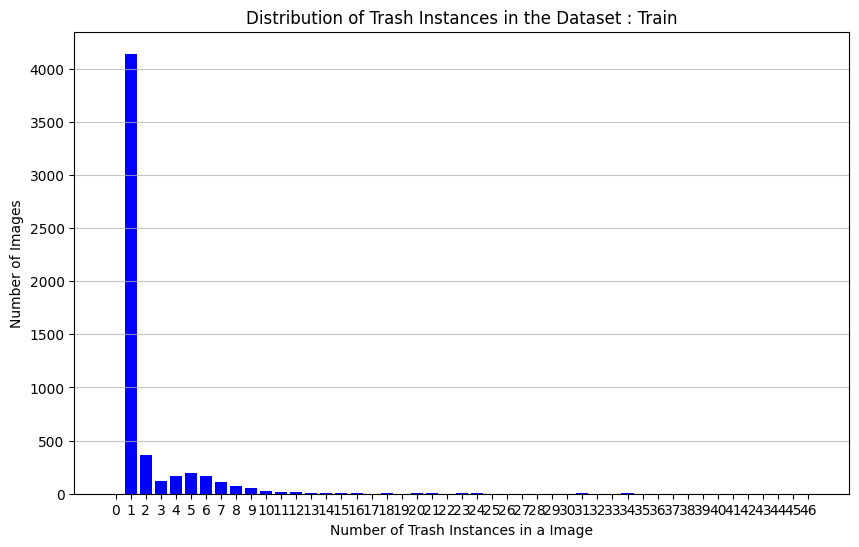

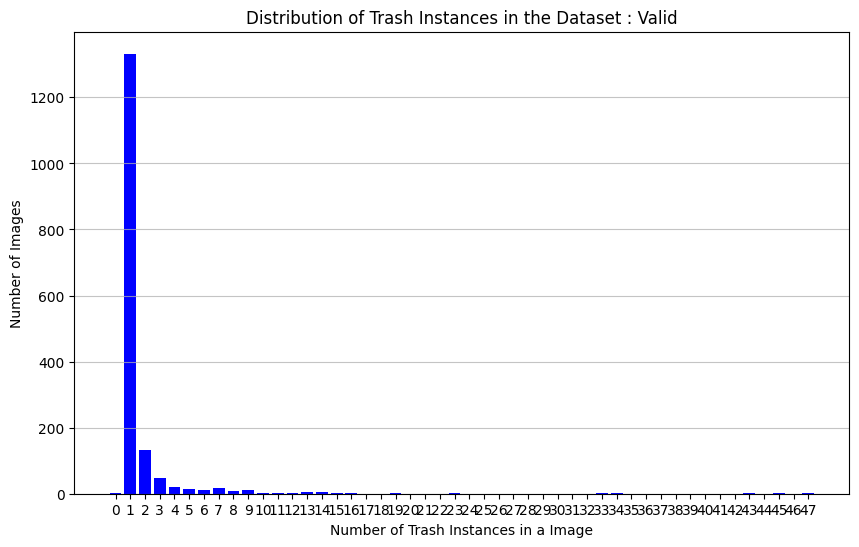

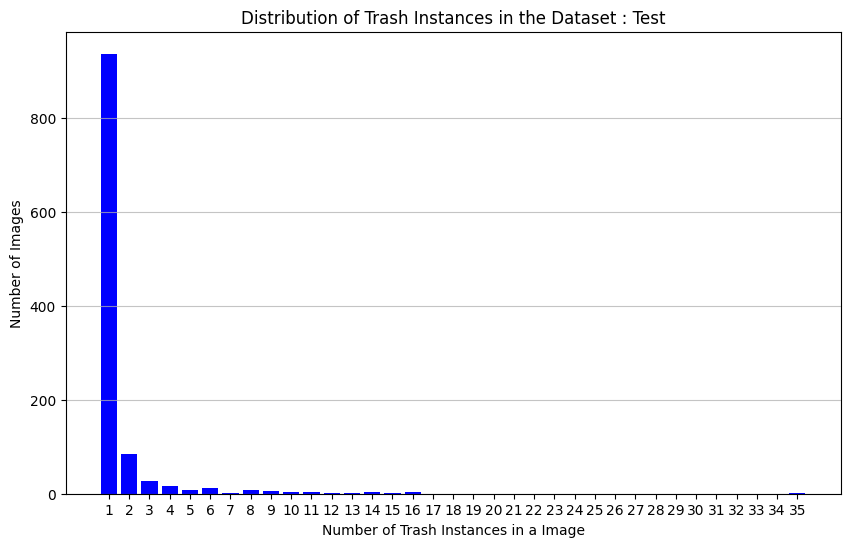

In [16]:
for i, df in enumerate(datasets):
  trash_counts = np.array(df['number of waste'])
  trash_counts = trash_counts.astype(int)
  plt.figure(figsize=(10, 6))
  plt.hist(trash_counts, bins=range(min(trash_counts), max(trash_counts) + 2), align='left', rwidth=0.8, color='blue')
  plt.xlabel('Number of Trash Instances in a Image')
  plt.ylabel('Number of Images')
  plt.title('Distribution of Trash Instances in the Dataset : ' + datasets_names[i])
  plt.xticks(range(min(trash_counts), max(trash_counts) + 1))
  plt.grid(axis='y', alpha=0.75)
  plt.show()

## B. Repartition of Trash Locations

In [17]:
def data_location(fold):
  """ Create dataframe for labels of the folder input """
  class_instances = []
  x_centers = []
  y_centers = []
  widths = []
  heights = []
  fold_path_im = os.path.join(data_path, fold + '/images')
  image_names = os.listdir(fold_path_im)
  fold_path_lab = os.path.join(data_path, fold + '/labels')
  labels_names = os.listdir(fold_path_lab)
  ims = []
  number_trash = np.array([])
  for image_name in image_names:
      for labels_name in labels_names:
        if labels_name.split('.txt')[0] == image_name[:len(image_name)-4]:
          filepath = os.path.join(fold_path_lab, labels_name)
          f = open(filepath, 'r')
          lines = f.readlines()
          for line in lines:
            label = line.split(' ')
            class_instances.append(float(label[0]))
            x_centers.append(float(label[1]))
            y_centers.append(float(label[2]))
            widths.append(float(label[3]))
            heights.append(float(label[4]))
  return pd.DataFrame({
      'class' : class_instances,
      'x_center' :  x_centers,
      'y_center' : y_centers,
      'width' : widths,
      'height' :  heights
  })
     

In [18]:
df_location_train = data_location('train')
df_location_train.head()

,class,x_center,y_center,width,height
0,0.0,0.277644,0.074519,0.079327,0.149038
1,0.0,0.195913,0.075721,0.067308,0.084135
2,0.0,0.376202,0.180288,0.164663,0.360577
3,0.0,0.224760,0.157452,0.122596,0.176683
4,0.0,0.705529,0.191106,0.433894,0.354567


In [19]:
df_location_valid = data_location('valid')
df_location_valid.head()

,class,x_center,y_center,width,height
0,0.0,0.572115,0.436298,0.484375,0.657452
1,0.0,0.463942,0.469952,0.239183,0.534856
2,0.0,0.578125,0.413462,0.463942,0.665865
3,0.0,0.519231,0.350962,0.599760,0.460337
4,0.0,0.593750,0.450721,0.310096,0.615385


In [20]:
df_location_test = data_location('test')
df_location_test.head()

,class,x_center,y_center,width,height
0,0.0,0.495192,0.495192,0.322115,0.456731
1,0.0,0.397837,0.506010,0.076923,0.075721
2,0.0,0.258413,0.579327,0.061298,0.134615
3,0.0,0.287260,0.640625,0.066106,0.100962
4,0.0,0.367788,0.644231,0.066106,0.115385


In [21]:
def heat_map(df, fold):
  fig, ax = plt.subplots()
  for index, row in df.iterrows():
      # Calculate the coordinates of the rectangle
      x = row['x_center'] - row['width'] / 2
      y = row['y_center'] - row['height'] / 2
      width = row['width']
      height = row['height']

      # Create a rectangle and add it to the plot
      rectangle = plt.Rectangle((x, y), width, height, facecolor="blue", edgecolor="black", alpha=0.005)
      ax.add_patch(rectangle)

  # Set axis labels or any other plot settings if needed
  ax.set_xlabel('X-axis label')
  ax.set_ylabel('Y-axis label')
  ax.invert_yaxis()

  # Show the plot
  plt.title('Garbage Location heatmap for Dataset ' + fold)
  plt.show()

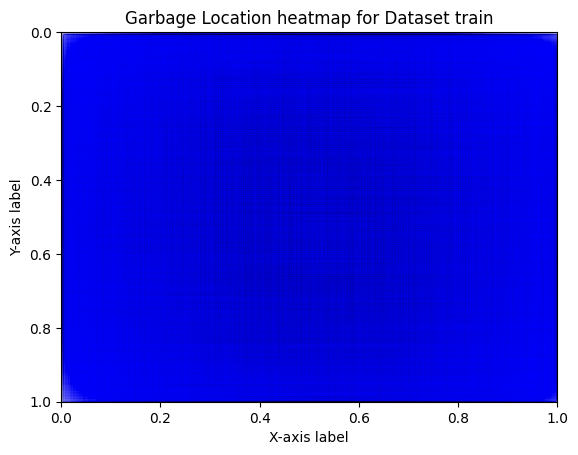

In [22]:
heat_map(df_location_train, 'train')

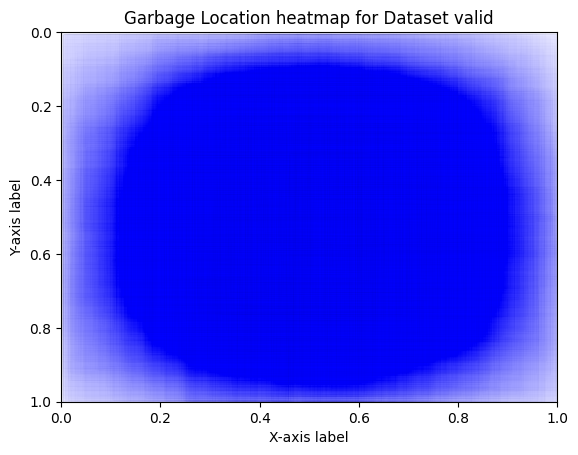

In [23]:
heat_map(df_location_valid, 'valid')

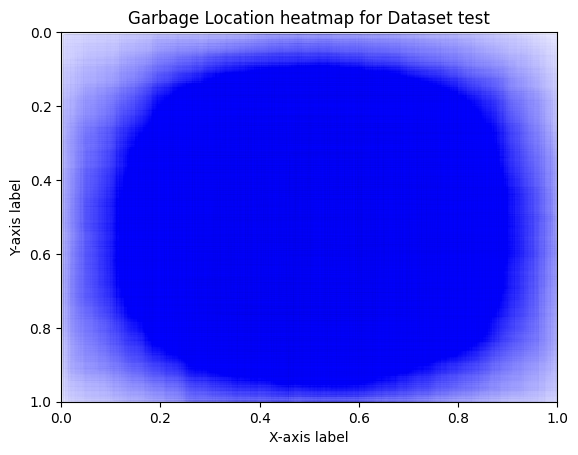

In [24]:
heat_map(df_location_valid, 'test')

# Clustering Surface / Under Water

use CLIP for classification tasks in a zero-shot [CLIP model card](https://github.com/openai/CLIP/blob/main/model-card.md)

In [ ]:
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

it looks to be :  surface of the water
probability : tensor([[0.7575, 0.2425]], grad_fn=<SoftmaxBackward0>)


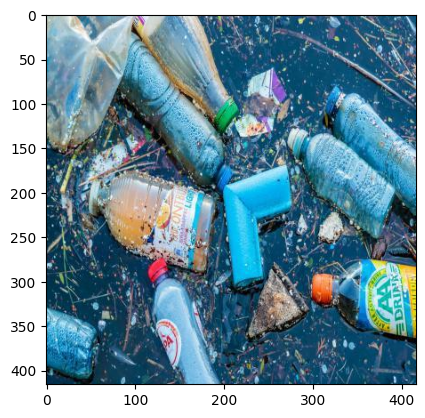

In [26]:
#First test
#load an image
image_name = 'plastic21_jpg.rf.1b918a70d199b337d91e0aa40dcd2434.jpg'
fold_path = os.path.join(data_path, 'train/images')
file_path = os.path.join(fold_path, image_name)
im =  Image.open(file_path)
plt.imshow(im)
#cluster by group text
text = ["surface of the water", "under the water"]
inputs = processor(text=text, images=im, return_tensors="pt", padding=True)
#result
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # prob to be in each group
probs_arr = [probs[0, 0].item() , probs[0, 1].item()]
max_index = probs_arr.index(max(probs_arr))
print('it looks to be : ', text[max_index])
print('probability :', probs)
     

In [27]:
def cluster_water(df, fold):
  """ for each images in the dataset in fold predict if it is under or at the surface of the water """
  #our group
  text = ["surface of the water", "under the water"]
  group = []
  image_names = np.array(df['image name'])
  fold_path_im = os.path.join(data_path, fold + '/images')

  start_time = time.time()
  for image_name in tqdm(image_names):

    file_path = os.path.join(fold_path_im, image_name)
    im =  Image.open(file_path)
    #compute clustering by group text
    inputs = processor(text=text, images=im, return_tensors="pt", padding=True)
    #result
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image # this is the image-text similarity score
    probs = logits_per_image.softmax(dim=1) # prob to be in each group
    probs_arr = [probs[0, 0].item() , probs[0, 1].item()]
    max_index = probs_arr.index(max(probs_arr))
    group.append(text[max_index])
     

  df['Group'] = group
  end_time = time.time()
  elapsed_time = end_time - start_time
  print(f"Elapsed Time: {elapsed_time} seconds")
  return df

## On our dataframes (test only)
Warning : you don't need to run, already run before and save in save_csv, Take a lot of time to run !

In [29]:

confirm = input('confirm to run clustering for test dataset : [y/N] ')
if confirm == 'y':
  df_test = cluster_water(df_test, 'test')

100%|██████████| 1114/1114 [16:16<00:00,  1.14it/s] 

Elapsed Time: 976.0064873695374 seconds


In [30]:
df_test.head()

,image name,number of waste,Group
0,13_jpg.rf.66bfb9ab5d1ddcfa48351a275b662de0.jpg,1.0,under the water
1,15_jpg.rf.c921a18631de7ff12168f4f1b9bf4210.jpg,13.0,under the water
2,1bc7-iudfmpmn7245599_jpg.rf.c753c3518aa3bd3046...,1.0,under the water
3,200623160205-05-coronavirus-waste-pollution-su...,3.0,surface of the water
4,26_jpg.rf.30ebcae5f6d3f646c1f12e666d4dcdf9.jpg,1.0,under the water


## Quick evaluation 

In [31]:
from IPython.display import display, clear_output

def annotation(df, fold, max_annotation):
    # our group
    text = ["surface of the water", "under the water", "can't tell"]
    real_group = [-1 for _ in range(df.shape[0])]
    image_names = np.array(df['image name'])
    fold_path_im = os.path.join(data_path, fold + '/images')
    
    for i in tqdm(range(len(image_names[:max_annotation]))):
        file_path = os.path.join(fold_path_im, image_names[i])
        im = Image.open(file_path)
        
        # Display the image
        display(f"Image {i} - {df['Group'].iloc[i]}") 
        display(im)
        
        # Create an interactive input widget for user labeling
        while True:
            label = input(f"Label: 0 for {text[0]} - 1 for {text[1]} - 2 for {text[2]}")
            try:
                # Store the label (you can append this to a list or a DataFrame)
                real_group[i] = text[int(label)]
                break
            except:
                continue
           
        # Clear the output and move to the next image
        clear_output(wait=True)

    df['real_group'] = real_group
    return df


In [33]:
df_test = annotation(df_test, 'test', 100)
df_test.head()

100%|██████████| 100/100 [02:45<00:00,  1.65s/it]


,image name,number of waste,Group,real_group
0,13_jpg.rf.66bfb9ab5d1ddcfa48351a275b662de0.jpg,1.0,under the water,under the water
1,15_jpg.rf.c921a18631de7ff12168f4f1b9bf4210.jpg,13.0,under the water,under the water
2,1bc7-iudfmpmn7245599_jpg.rf.c753c3518aa3bd3046...,1.0,under the water,under the water
3,200623160205-05-coronavirus-waste-pollution-su...,3.0,surface of the water,under the water
4,26_jpg.rf.30ebcae5f6d3f646c1f12e666d4dcdf9.jpg,1.0,under the water,under the water


In [37]:
total, correct = 0, 0
for i in range(df_test.shape[0]):
    rgroup = df_test['real_group'].iloc[i]
    if rgroup == -1:
        break
    if rgroup ==  "can't tell":
        continue 
    pgroup = df_test['Group'].iloc[i]

    if rgroup == pgroup:
        correct += 1
    total += 1 
print(f"accuracy {correct/total*100}%")

accuracy 81.0%
